<a href="https://colab.research.google.com/github/prevencao/trading/blob/master/modeloProfetaFacebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://thecleverprogrammer.com/2020/08/09/stock-price-prediction-with-facebook-prophet-model/

# Previsão do preço das ações com o modelo do Profeta do Facebook

In [ ]:
#!pip install fbprophet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import warnings
import fbprophet

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


ler e analisar os dados com os quais trabalhamos:

In [ ]:
'''from google.colab import files
uploaded = files.upload()'''
data = pd.read_csv("AAPL.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-26,205.860001,207.190002,205.059998,206.490005,204.461349,26043600
1,2019-08-27,207.860001,208.550003,203.529999,204.160004,202.154251,25873300
2,2019-08-28,204.100006,205.720001,203.320007,205.529999,203.510803,15938800
3,2019-08-29,208.500000,209.320007,206.660004,209.009995,206.956604,20990500
4,2019-08-30,210.160004,210.449997,207.199997,208.740005,206.689255,21143400


visualizar os dados para que possamos obter alguns insights melhores sobre os dados com os quais trabalharemos:

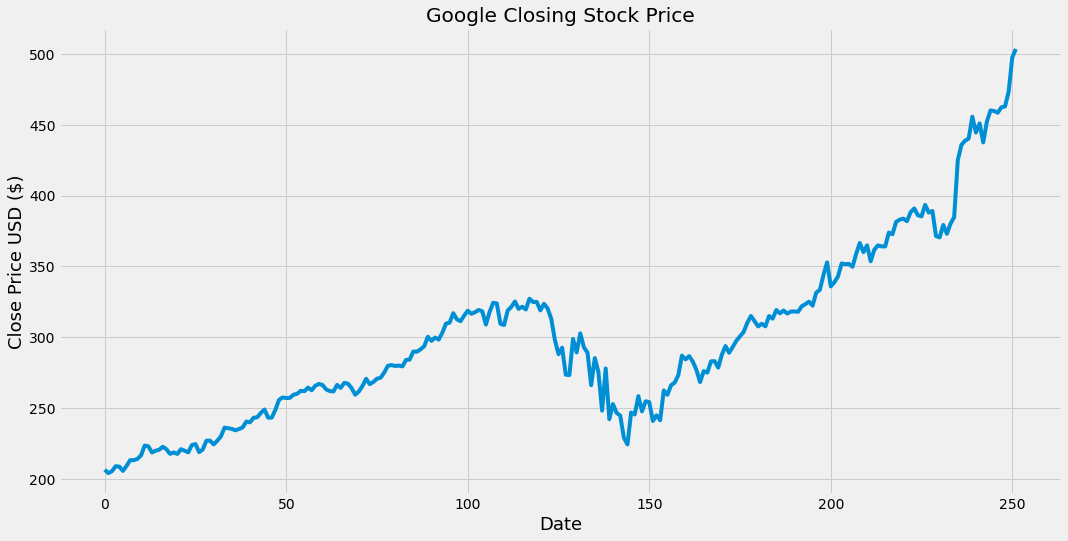

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Google Closing Stock Price")
plt.plot(data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

Apenas dois recursos são necessários do conjunto de dados, que é a data e os preços de fechamento. Então, vamos preparar os dados para nosso modelo:

In [ ]:
data = data[["Date","Close"]] 
data = data.rename(columns = {"Date":"ds","Close":"y"})
data.head()

,ds,y
0,2019-08-26,206.490005
1,2019-08-27,204.160004
2,2019-08-28,205.529999
3,2019-08-29,209.009995
4,2019-08-30,208.740005


ajustar os dados ao modelo do Profeta do Facebook para a previsão do preço das ações do Google

In [ ]:
from fbprophet import Prophet
m = Prophet(daily_seasonality=True)
m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Ajustamos com sucesso os dados ao modelo do Profeta do Facebook. Agora vamos dar uma olhada na previsão do preço das ações feita pelo modelo

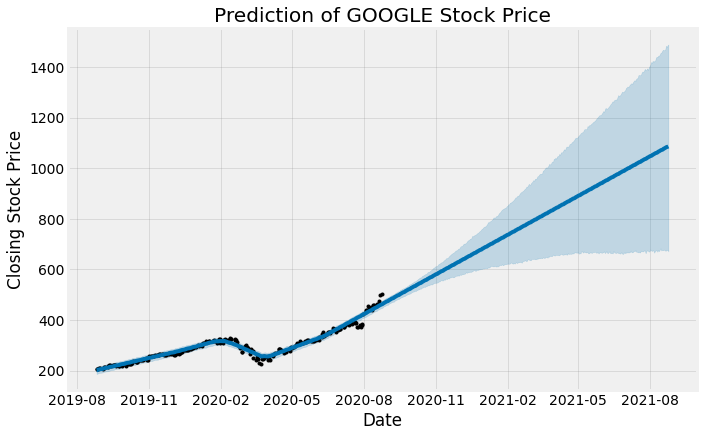

In [ ]:
future = m.make_future_dataframe(periods=365)
predictions=m.predict(future)
m.plot(predictions)
plt.title("Prediction of GOOGLE Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

Agora, vamos dar uma olhada nos efeitos sazonais nesta previsão feita por nosso modelo:

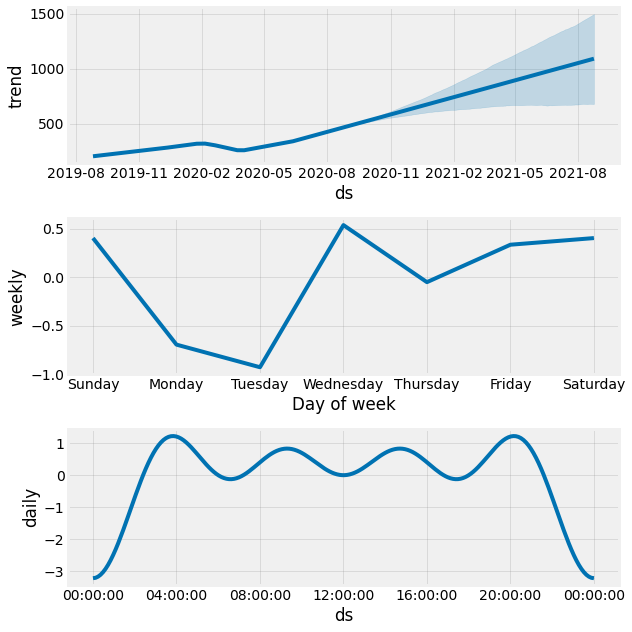

In [ ]:
m.plot_components(predictions)
plt.show()